In [1]:
""" Warning : Don't forget to remove your github username and token after running this cell """
 
import pandas as pd
import requests
import io
 
# Username of your GitHub account
 
username = ''
 
# Personal Access Token (PAO) from your GitHub account
 
token = ''
 
# Creates a re-usable session object with your creds in-built
 
github_session = requests.Session()
github_session.auth = (username, token)

In [2]:
#Loading the file so we can be able to clean it

url = 'https://raw.githubusercontent.com/OmdenaAI/WeoWater/main/task-4-scraping-newspapers/labelled_data/merged_labeled_newspaper_data.csv'
download = github_session.get(url).content #Reading and downloading the data

data = pd.read_csv(io.StringIO(download.decode('utf-8'))) #Converting the data into a pd dataframe

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4749 entries, 0 to 4748
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         4749 non-null   int64  
 1   event_id           4749 non-null   object 
 2   article_title      4749 non-null   object 
 3   article_link       4749 non-null   object 
 4   article_content    4361 non-null   object 
 5   publishing_date    4703 non-null   object 
 6   article_image      4302 non-null   object 
 7   article_keywords   4748 non-null   object 
 8   article_relevance  4230 non-null   object 
 9   Unnamed: 10        1 non-null      object 
 10  category           3783 non-null   object 
 11  Country            4749 non-null   object 
 12  Unnamed: 11        1 non-null      object 
 13  Unnamed: 9         0 non-null      float64
 14  Category           316 non-null    object 
 15  Unnamed: 12        0 non-null      float64
 16  Unnamed: 13        0 non

In [4]:
data.head()

,Unnamed: 0,event_id,article_title,article_link,article_content,publishing_date,article_image,article_keywords,article_relevance,Unnamed: 10,category,Country,Unnamed: 11,Unnamed: 9,Category,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,0,DR-2021-000022-AFG,"After drought and floods, Afghanistan confront...",https://www.reuters.com/article/us-afghanistan...,"KABUL/MAZAR-I-SHARIF, Afghanistan (Reuters) - ...","Wed, 27 Mar 2019 07:00:00 GMT",https://static.reuters.com/resources/r/?m=02&d...,"['displaced', 'food', 'lanzer', 'representativ...",,NaN,flood_drought,Afghanista,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,DR-2021-000022-AFG,"500,000 children affected by drought in Afghan...",https://www.unicef.org/press-releases/500000-c...,"KABUL, 23 April 2018 – The extremely dry winte...","Mon, 23 Apr 2018 07:00:00 GMT",https://www.unicef.org/themes/custom/unicef_ba...,"['malnutrition', 'water', 'affected', 'drought...",,NaN,flood_drought,Afghanista,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,DR-2021-000022-AFG,Afghanistan: Drought - 2018-2019 - ReliefWeb,https://reliefweb.int/disaster/dr-2018-000052-afg,La Niña has had a devastating effect on this y...,"Tue, 15 May 2018 09:34:06 GMT",https://reliefweb.int/apple-touch-icon.png,"['food', 'ipc', 'households', 'affected', 'dro...",,NaN,drought,Afghanista,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,DR-2021-000022-AFG,"War, drought, diplomatic rifts deepen Afghanis...",https://www.aljazeera.com/features/2019/5/5/wa...,Worst drought in a decade highlights poor infr...,"Sun, 05 May 2019 07:00:00 GMT",https://www.aljazeera.com/wp-content/uploads/2...,"['rifts', 'war', 'afghanistans', 'water', 'dam...",,NaN,drought,Afghanista,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,DR-2021-000022-AFG,'The country could fall apart': drought and de...,https://www.theguardian.com/global-development...,Shafiqa watches closely over her six-month-old...,"Mon, 25 Mar 2019 07:00:00 GMT",https://i.guim.co.uk/img/media/26284f9ae5aa849...,"['malnutrition', 'apart', 'food', 'hospital', ...",,NaN,none,Afghanista,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data_copy = data.copy()

In [6]:
data.drop('Country', inplace = True, axis = 1)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4749 entries, 0 to 4748
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         4749 non-null   int64  
 1   event_id           4749 non-null   object 
 2   article_title      4749 non-null   object 
 3   article_link       4749 non-null   object 
 4   article_content    4361 non-null   object 
 5   publishing_date    4703 non-null   object 
 6   article_image      4302 non-null   object 
 7   article_keywords   4748 non-null   object 
 8   article_relevance  4230 non-null   object 
 9   Unnamed: 10        1 non-null      object 
 10  category           3783 non-null   object 
 11  Unnamed: 11        1 non-null      object 
 12  Unnamed: 9         0 non-null      float64
 13  Category           316 non-null    object 
 14  Unnamed: 12        0 non-null      float64
 15  Unnamed: 13        0 non-null      float64
 16  Unnamed: 14        0 non

In [8]:
data['category'] = data[data.columns[8:]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1)

In [9]:
#Dropping unnecessary columns

data.drop(data.columns[data.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)#Dropping unnamed columns in the file

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4749 entries, 0 to 4748
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   event_id           4749 non-null   object
 1   article_title      4749 non-null   object
 2   article_link       4749 non-null   object
 3   article_content    4361 non-null   object
 4   publishing_date    4703 non-null   object
 5   article_image      4302 non-null   object
 6   article_keywords   4748 non-null   object
 7   article_relevance  4230 non-null   object
 8   category           4749 non-null   object
 9   Category           316 non-null    object
dtypes: object(10)
memory usage: 371.1+ KB


In [11]:
data.head(3)

,event_id,article_title,article_link,article_content,publishing_date,article_image,article_keywords,article_relevance,category,Category
0,DR-2021-000022-AFG,"After drought and floods, Afghanistan confront...",https://www.reuters.com/article/us-afghanistan...,"KABUL/MAZAR-I-SHARIF, Afghanistan (Reuters) - ...","Wed, 27 Mar 2019 07:00:00 GMT",https://static.reuters.com/resources/r/?m=02&d...,"['displaced', 'food', 'lanzer', 'representativ...",,",flood_drought",NaN
1,DR-2021-000022-AFG,"500,000 children affected by drought in Afghan...",https://www.unicef.org/press-releases/500000-c...,"KABUL, 23 April 2018 – The extremely dry winte...","Mon, 23 Apr 2018 07:00:00 GMT",https://www.unicef.org/themes/custom/unicef_ba...,"['malnutrition', 'water', 'affected', 'drought...",,",flood_drought",NaN
2,DR-2021-000022-AFG,Afghanistan: Drought - 2018-2019 - ReliefWeb,https://reliefweb.int/disaster/dr-2018-000052-afg,La Niña has had a devastating effect on this y...,"Tue, 15 May 2018 09:34:06 GMT",https://reliefweb.int/apple-touch-icon.png,"['food', 'ipc', 'households', 'affected', 'dro...",,",drought",NaN


In [12]:
# replace field that's entirely space (or empty) with NaN
import numpy as np
data = data.replace(r'^\s*$', np.nan, regex=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4749 entries, 0 to 4748
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   event_id           4749 non-null   object
 1   article_title      4749 non-null   object
 2   article_link       4749 non-null   object
 3   article_content    4361 non-null   object
 4   publishing_date    4703 non-null   object
 5   article_image      4302 non-null   object
 6   article_keywords   4748 non-null   object
 7   article_relevance  253 non-null    object
 8   category           4345 non-null   object
 9   Category           315 non-null    object
dtypes: object(10)
memory usage: 371.1+ KB


In [14]:
to_drop = ['Category']#Columns to be dropped 

data.drop(to_drop, inplace = True, axis = 1)
data.sample(5)#Checking if the correct columns have been dropped

,event_id,article_title,article_link,article_content,publishing_date,article_image,article_keywords,article_relevance,category
2430,FL-2020-000196-NGA,Largest dating apps join effort to get younger...,https://www.yahoo.com/gma/largest-dating-apps-...,ABC News\n\nMore than two years after Ronald G...,"Fri, 21 May 2021 07:41:01 GMT",https://s.yimg.com/hd/cp-video-transcode/prod/...,"['apps', 'videos', 'video', 'dating', 'louisia...",NaN,",flood"
4389,FL-2020-000210-VNM,"Death Toll From Floods Climbs in Vietnam, Whil...",https://www.rfa.org/english/news/vietnam/toll-...,Local residents and volunteers deliver aid pac...,"Tue, 20 Oct 2020 07:00:00 GMT",https://www.rfa.org/english/news/vietnam/toll-...,"['told', 'authorities', 'aid', 'cambodia', 'wa...",NaN,",flood"
1719,FL-2020-000164-IND,Pagasa: Monsoon rains loom in western sections...,https://newsinfo.inquirer.net/1299255/pagasa-m...,"MANILA, Philippines — People living in the wes...","Mon, 29 Jun 2020 07:00:00 GMT",https://newsinfo.inquirer.net/files/2020/06/1i...,"['zambales', 'sections', 'expect', 'warned', '...",NaN,",none"
4086,FL-2018-000121-VNM,How a green pillow is helping to save Hoi An f...,https://www.smh.com.au/world/asia/how-a-green-...,"Save Log in , register or subscribe to save ar...","Mon, 10 May 2021 07:00:00 GMT",https://static.ffx.io/images/$zoom_0.3442%2C$m...,"['palms', 'triem', 'land', 'pillow', 'change',...",NaN,",none"
2275,FL-2020-000207-NGA,2023: Ortom for Senate Posters Flood Benue Sta...,https://www.legit.ng/1416401-2023-ortom-senate...,- Pressure is mounting on Governor Samuel Orto...,"Wed, 19 May 2021 16:19:02 GMT",https://netstorage-legit.akamaized.net/images/...,"['samuel', 'terver', 'governor', 'spokesman', ...",NaN,",none"


In [15]:
data['country'] = data_copy['Country']

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4749 entries, 0 to 4748
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   event_id           4749 non-null   object
 1   article_title      4749 non-null   object
 2   article_link       4749 non-null   object
 3   article_content    4361 non-null   object
 4   publishing_date    4703 non-null   object
 5   article_image      4302 non-null   object
 6   article_keywords   4748 non-null   object
 7   article_relevance  253 non-null    object
 8   category           4345 non-null   object
 9   country            4749 non-null   object
dtypes: object(10)
memory usage: 371.1+ KB


In [17]:
data[data.article_relevance.notnull()]

,event_id,article_title,article_link,article_content,publishing_date,article_image,article_keywords,article_relevance,category,country
200,DR-2014-000109-CHN,Worst drought in 63 years hits Liaoning provin...,https://www.scmp.com/news/china/article/157349...,Liaoning averaged 90mm across the province in ...,"Thu, 14 Aug 2014 07:00:00 GMT",https://cdn1.i-scmp.com/sites/default/files/st...,"['averaged', 'liaoning', 'hits', 'dry', 'droug...",yes,yes,China
201,DR-2014-000109-CHN,"In Time Of Drought, U.S. West's Alfalfa Export...",https://www.npr.org/2014/08/12/339753108/in-ti...,"In Time Of Drought, U.S. West's Alfalfa Export...","Tue, 12 Aug 2014 07:00:00 GMT",https://media.npr.org/include/images/facebook-...,"['criticized', 'river', 'drought', 'farmers', ...",yes,yes,China
202,DR-2014-000109-CHN,"More Chinese on the Coast, Less Fish in the Se...",https://www.scientificamerican.com/article/mor...,China's booming economic growth is helping to ...,"Fri, 08 Aug 2014 07:00:00 GMT",http://www.scientificamerican.com/themes/respo...,"['bertness', 'chinese', 'research', 'sea', 'ec...",no,no,China
203,DR-2014-000109-CHN,Climate change and drought in ancient times - ...,https://www.sciencedaily.com/releases/2014/08/...,The influence of climate on agriculture is bel...,"Mon, 11 Aug 2014 07:00:00 GMT",https://www.sciencedaily.com/images/scidaily-i...,"['climate', 'drought', 'ancient', 'agriculture...",yes,yes,China
204,DR-2014-000109-CHN,Drought-Resistant Rice Sows Wealth in India - ...,https://www.wsj.com/articles/drought-resistant...,NaN,"Mon, 04 Aug 2014 07:00:00 GMT",NaN,[],no,no,China
...,...,...,...,...,...,...,...,...,...,...
455,Drought Sri Lanka,An end to desertification - Sunday Observer,https://sundayobserver.lk/2017/06/18/end-deser...,Most parts of Sri Lanka have just emerged out ...,"Sun, 18 Jun 2017 07:00:00 GMT",http://www.sundayobserver.lk/sites/default/fil...,"['million', 'land', 'end', 'countries', 'deser...",drought,drought,Sri Lanka
1255,FL-2017-000067-BRA,Preço da Netflix sobe no Brasil,veja quanto é a sua nova mensalidade - TecMundo,https://www.tecmundo.com.br/netflix/117833-pre...,O serviço de streaming Netflix anunciou nesta ...,"Thu, 15 Jun 2017 07:00:00 GMT",https://img.ibxk.com.br/2017/06/15/15150821651...,"['da', 'valor', 'sua', 'quanto', 'r', 'uma', '...","['da', 'valor', 'sua', 'quanto', 'r', 'uma', '...",Brazil
1699,FL-2020-000164-IND,Intense monsoon rain over west and central Ind...,https://www.tribuneindia.com/news/nation/inten...,"Tribune News Service\n\nNew Delhi, July 1\n\nT...","Wed, 01 Jul 2020 07:00:00 GMT",https://englishtribuneimages.blob.core.windows...,"['rainfall', 'imd', 'till', 'madhya', 'widespr...",flood,"flood,flood",India
1700,FL-2020-000164-IND,Global ripple effect of shifting monsoons - Sc...,https://www.sciencedaily.com/releases/2020/06/...,Scientists from the Department of Energy's Oak...,"Mon, 29 Jun 2020 07:00:00 GMT",https://www.sciencedaily.com/images/scidaily-i...,"['team', 'simulations', 'season', 'effect', 'r...",none,"none,none",India


In [18]:
data['article_relevance'].value_counts()

no                                                                                                                                                                        87
none                                                                                                                                                                      75
drought                                                                                                                                                                   56
yes                                                                                                                                                                       12
both                                                                                                                                                                       8
flood                                                                                                                                  

In [19]:
data_copy2 = data.copy()

In [20]:
list_ = ['no','none','drought','yes','both','flood',' drought',' none',' yes',' both']

In [21]:
df_concat = data[data['article_relevance'].isin(list_)]

In [22]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251 entries, 200 to 1700
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   event_id           251 non-null    object
 1   article_title      251 non-null    object
 2   article_link       251 non-null    object
 3   article_content    229 non-null    object
 4   publishing_date    251 non-null    object
 5   article_image      224 non-null    object
 6   article_keywords   251 non-null    object
 7   article_relevance  251 non-null    object
 8   category           251 non-null    object
 9   country            251 non-null    object
dtypes: object(10)
memory usage: 21.6+ KB


In [23]:
df = data[data.article_relevance.isnull()]

In [24]:
df =pd.concat([df_concat,df])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4747 entries, 200 to 4748
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   event_id           4747 non-null   object
 1   article_title      4747 non-null   object
 2   article_link       4747 non-null   object
 3   article_content    4359 non-null   object
 4   publishing_date    4701 non-null   object
 5   article_image      4300 non-null   object
 6   article_keywords   4746 non-null   object
 7   article_relevance  251 non-null    object
 8   category           4343 non-null   object
 9   country            4747 non-null   object
dtypes: object(10)
memory usage: 407.9+ KB


In [25]:
# keep first duplicate row
df = df.drop_duplicates()

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4747 entries, 200 to 4748
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   event_id           4747 non-null   object
 1   article_title      4747 non-null   object
 2   article_link       4747 non-null   object
 3   article_content    4359 non-null   object
 4   publishing_date    4701 non-null   object
 5   article_image      4300 non-null   object
 6   article_keywords   4746 non-null   object
 7   article_relevance  251 non-null    object
 8   category           4343 non-null   object
 9   country            4747 non-null   object
dtypes: object(10)
memory usage: 407.9+ KB


In [27]:
df['article_relevance'].value_counts()

no          87
none        75
drought     56
yes         12
both         8
flood        7
 none        2
 drought     2
 both        1
 yes         1
Name: article_relevance, dtype: int64

In [28]:
df.drop('article_relevance', inplace = True, axis = 1)

In [29]:
df.category.unique()

array([' yes', 'yes', 'no', 'no, ', 'drought', 'none', 'both', 'flood',
       ' drought', ' none', ' both', 'flood,flood', ' none,none',
       ' ,flood_drought', ' ,drought', ' ,none', ' ,flood', nan,
       'flood_and_drought', 'climate_change', ' ,drought, flood',
       ' ,drought,flood', ' ,flood - drought', ' ,Drought', ' ,nnone',
       ' ,Flood', ' ,Tree', ' ,Flood_and_Drought', ' ,flood_and_drought',
       ' ,tree', ' ,flood,flood', ' ,none,flood',
       ' ,Main responsibilities:', ' ,missing', ' ,fldood', ' ,None',
       ' ,floood'], dtype=object)

In [30]:
df_yes = df[df.category == ' ,none,flood']
df_yes.head()

,event_id,article_title,article_link,article_content,publishing_date,article_image,article_keywords,category,country
1767,FL-2021-000021-IND,EXPLAINER: How glaciers can burst and send flo...,https://apnews.com/article/how-glaciers-can-bu...,NaN,"Sun, 07 Feb 2021 08:00:00 GMT",https://storage.googleapis.com/afs-prod/media/...,"['glaciers', 'downstream', 'explainer', 'flood...",",none,flood",India


In [52]:
df_yes['article_title'][1767]

'EXPLAINER: How glaciers can burst and send floods downstream - Associated Press'

In [31]:
df['category'] = df['category'].replace({' yes':'drought', 'yes':'drought', 'no':'none', 'no, ':'none', 'both':'flood_drought'})

In [32]:
df.category.unique()

array(['drought', 'none', 'flood_drought', 'flood', ' drought', ' none',
       ' both', 'flood,flood', ' none,none', ' ,flood_drought',
       ' ,drought', ' ,none', ' ,flood', nan, 'flood_and_drought',
       'climate_change', ' ,drought, flood', ' ,drought,flood',
       ' ,flood - drought', ' ,Drought', ' ,nnone', ' ,Flood', ' ,Tree',
       ' ,Flood_and_Drought', ' ,flood_and_drought', ' ,tree',
       ' ,flood,flood', ' ,none,flood', ' ,Main responsibilities:',
       ' ,missing', ' ,fldood', ' ,None', ' ,floood'], dtype=object)

In [33]:
df['category'] = df['category'].replace({'flood,flood': 'flood', 'fldood': 'flood', 'Flood': 'flood', 'floood': 'flood'})

In [34]:
df.category.unique()

array(['drought', 'none', 'flood_drought', 'flood', ' drought', ' none',
       ' both', ' none,none', ' ,flood_drought', ' ,drought', ' ,none',
       ' ,flood', nan, 'flood_and_drought', 'climate_change',
       ' ,drought, flood', ' ,drought,flood', ' ,flood - drought',
       ' ,Drought', ' ,nnone', ' ,Flood', ' ,Tree', ' ,Flood_and_Drought',
       ' ,flood_and_drought', ' ,tree', ' ,flood,flood', ' ,none,flood',
       ' ,Main responsibilities:', ' ,missing', ' ,fldood', ' ,None',
       ' ,floood'], dtype=object)

In [35]:
df['category'] = df['category'].replace({'None':'none','flood_and_drought':'flood_drought','none,flood':'flood'})

In [36]:
df.category.unique()

array(['drought', 'none', 'flood_drought', 'flood', ' drought', ' none',
       ' both', ' none,none', ' ,flood_drought', ' ,drought', ' ,none',
       ' ,flood', nan, 'climate_change', ' ,drought, flood',
       ' ,drought,flood', ' ,flood - drought', ' ,Drought', ' ,nnone',
       ' ,Flood', ' ,Tree', ' ,Flood_and_Drought', ' ,flood_and_drought',
       ' ,tree', ' ,flood,flood', ' ,none,flood',
       ' ,Main responsibilities:', ' ,missing', ' ,fldood', ' ,None',
       ' ,floood'], dtype=object)

In [37]:
df['category'] = df['category'].replace({' drought':'drought', ' none':'none',' both':'flood_drought', ' none,none':'none', ' ,flood_drought':'flood_drought', ' ,drought':'drought', ' ,none':'none'})

In [38]:
df.category.unique()

array(['drought', 'none', 'flood_drought', 'flood', ' ,flood', nan,
       'climate_change', ' ,drought, flood', ' ,drought,flood',
       ' ,flood - drought', ' ,Drought', ' ,nnone', ' ,Flood', ' ,Tree',
       ' ,Flood_and_Drought', ' ,flood_and_drought', ' ,tree',
       ' ,flood,flood', ' ,none,flood', ' ,Main responsibilities:',
       ' ,missing', ' ,fldood', ' ,None', ' ,floood'], dtype=object)

In [39]:
df['category'] = df['category'].replace({' ,flood':'flood',' ,drought, flood':'flood_drought', ' ,drought,flood' : 'flood_drought'})

In [40]:
df.category.unique()

array(['drought', 'none', 'flood_drought', 'flood', nan, 'climate_change',
       ' ,flood - drought', ' ,Drought', ' ,nnone', ' ,Flood', ' ,Tree',
       ' ,Flood_and_Drought', ' ,flood_and_drought', ' ,tree',
       ' ,flood,flood', ' ,none,flood', ' ,Main responsibilities:',
       ' ,missing', ' ,fldood', ' ,None', ' ,floood'], dtype=object)

In [41]:
df['category'] = df['category'].replace({' ,flood - drought':'flood_drought', ' ,Drought':'drought', ' ,nnone':'none', ' ,Flood':'flood',
                                         ' ,Tree':'tree',' ,Flood_and_Drought':'flood_drought', ' ,flood_and_drought':'flood_drought',
                                         ' ,tree':'tree',' ,flood,flood':'flood', ' ,none,flood':'none', ' ,fldood':'flood',
                                         ' ,None':'none', ' ,floood':'flood'})

In [42]:
df.category.unique()

array(['drought', 'none', 'flood_drought', 'flood', nan, 'climate_change',
       'tree', ' ,Main responsibilities:', ' ,missing'], dtype=object)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4747 entries, 200 to 4748
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   event_id          4747 non-null   object
 1   article_title     4747 non-null   object
 2   article_link      4747 non-null   object
 3   article_content   4359 non-null   object
 4   publishing_date   4701 non-null   object
 5   article_image     4300 non-null   object
 6   article_keywords  4746 non-null   object
 7   category          4343 non-null   object
 8   country           4747 non-null   object
dtypes: object(9)
memory usage: 370.9+ KB


In [44]:
df = df[df.category != ' ,Main responsibilities:']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4746 entries, 200 to 4748
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   event_id          4746 non-null   object
 1   article_title     4746 non-null   object
 2   article_link      4746 non-null   object
 3   article_content   4358 non-null   object
 4   publishing_date   4700 non-null   object
 5   article_image     4299 non-null   object
 6   article_keywords  4745 non-null   object
 7   category          4342 non-null   object
 8   country           4746 non-null   object
dtypes: object(9)
memory usage: 370.8+ KB


In [45]:
df = df[df.category != ' ,missing']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4742 entries, 200 to 4748
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   event_id          4742 non-null   object
 1   article_title     4742 non-null   object
 2   article_link      4742 non-null   object
 3   article_content   4356 non-null   object
 4   publishing_date   4696 non-null   object
 5   article_image     4297 non-null   object
 6   article_keywords  4741 non-null   object
 7   category          4338 non-null   object
 8   country           4742 non-null   object
dtypes: object(9)
memory usage: 370.5+ KB


In [46]:
#converting publishing date from object to datetime
df['publishing_date'] = pd.to_datetime(df['publishing_date'], errors='coerce',utc=True)
df = df.dropna(subset=['publishing_date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4695 entries, 200 to 4748
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   event_id          4695 non-null   object             
 1   article_title     4695 non-null   object             
 2   article_link      4695 non-null   object             
 3   article_content   4309 non-null   object             
 4   publishing_date   4695 non-null   datetime64[ns, UTC]
 5   article_image     4251 non-null   object             
 6   article_keywords  4695 non-null   object             
 7   category          4291 non-null   object             
 8   country           4695 non-null   object             
dtypes: datetime64[ns, UTC](1), object(8)
memory usage: 366.8+ KB


In [47]:
df['category'].value_counts()

flood             2194
none              1631
drought            324
flood_drought      124
tree                11
climate_change       7
Name: category, dtype: int64

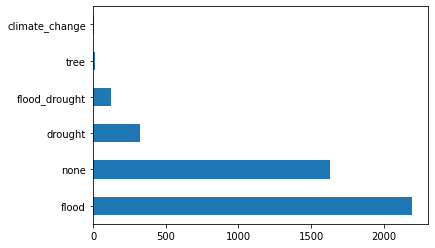

In [48]:
df['category'].value_counts().plot(kind='barh')

In [49]:
df['data source'] = 'newspaper'

In [50]:
df.to_csv('cleaned_merged_labbeled_newspaper_data.csv')

In [51]:
df.sample(10)

,event_id,article_title,article_link,article_content,publishing_date,article_image,article_keywords,category,country,data source
1818,FL-2021-000021-IND,"Central, State Agencies Monitoring Uttarakhand...",http://www.businessworld.in/article/Central-St...,Respective agencies of the Centre and State ar...,2021-02-09 08:00:00+00:00,https://aniportalimages.s3.amazonaws.com/media...,"['rajya', 'glacier', 'monitoring', 'state', 'a...",flood,India,newspaper
4336,FL-2020-000211-VNM,Food shortages loom after floods destroy centr...,https://e.vnexpress.net/news/news/food-shortag...,A man takes soil samples over what used to be ...,2020-12-03 08:00:00+00:00,https://vcdn-english.vnecdn.net/2020/12/02/a20...,"['shortages', 'vietnam', 'buried', 'paddy', 'f...",flood,Vietnam,newspaper
3447,FL-2020-000132-UGA,Let’s work together to stop floods - Daily Mon...,https://www.monitor.co.ug/uganda/oped/letters/...,By Guest Writer More by this Author\n\nThe rec...,2021-04-03 07:00:00+00:00,https://www.monitor.co.ug/resource/blob/161871...,"['song', 'stop', 'work', 'lets', 'know', 'dont...",NaN,Uganda,newspaper
4001,FL-2018-000074-VNM,"Typhoon Molave lashes Vietnam, leaving floods ...",https://www.scmp.com/week-asia/health-environm...,Women walk past uprooted trees in central Viet...,2020-10-28 07:00:00+00:00,https://cdn.i-scmp.com/sites/default/files/sty...,"['vietnam', 'wake', 'past', 'despair', 'trees'...",flood,Vietnam,newspaper
3154,FL-2019-000087-PAK,"Poor planning, civic apathy and huge floods i...",https://scroll.in/article/971971/poor-planning...,It does not always rain in Karachi during the ...,2020-09-02 07:00:00+00:00,https://s01.sgp1.cdn.digitaloceanspaces.com/bo...,"['rains', 'rainfall', 'huge', 'poor', 'pakista...",flood,Pakistan,newspaper
1540,FL-2019-000179-CAN,120 Canadian soldiers deployed to flood-prone ...,https://globalnews.ca/news/5186587/new-brunswi...,Send this page to someone via email\n\nAbout 1...,2019-04-20 07:00:00+00:00,https://globalnews.ca/wp-content/uploads/2019/...,"['rise', 'water', 'brunswick', 'areas', 'river...",flood,Canada,newspaper
2123,FL-2017-000067-BRA,WATCH: Thousands of Rare Turtle Hatchlings Flo...,https://www.news18.com/news/buzz/watch-thousan...,Hundreds and thousands of Giant South American...,2020-12-19 08:00:00+00:00,https://images.news18.com/ibnlive/uploads/2020...,"['hatchlings', 'watch', 'wcs', 'tsunami', 'rar...",none,Kenya,newspaper
1952,FL-2021-000030-IDN,Fake ‘Survey Reports’ Flood Bengal Ahead Of Ph...,https://www.outlookindia.com/website/story/ind...,At least three “survey reports” are doing the ...,2021-03-31 07:00:00+00:00,https://www.outlookindia.com/public/upload_sha...,"['fake', 'media', 'phase', 'predicted', 'flood...",none,India,newspaper
2707,FL-2018-000120-NGA,Death toll from floods in Nigeria climbs to 95...,https://www.aa.com.tr/en/africa/death-toll-fro...,NaN,2020-10-01 07:00:00+00:00,NaN,[],none,Nigeria,newspaper
2059,FL-2021-000038-KEN,Science Fiction: ‘Lord of Order’ Review - The ...,https://www.wsj.com/articles/science-fiction-l...,NaN,2021-04-16 07:00:00+00:00,NaN,[],none,Kenya,newspaper
